In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, solve

## The Problem
<div>
    <table>
        <thead>
            <tr>
                <th>Machine</th>
                <th>Product 1</th>
                <th>Product 2</th>
                <th>Available Hours</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Machine 1</td>
                <td>2 hrs</td>
                <td>1 hr</td>
                <td>8 hrs</td>
            </tr>
            <tr>
                <td>Machine 2</td>
                <td>1 hr</td>
                <td>2 hrs</td>
                <td>8 hrs</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <td>Unit Profit</td>
                <td>&#36;300</td>
                <td>&#36;200</td>
                <td>&nbsp;</td>
            </tr>
        </tfoot>
    </table>
</div>
<div>
    <div>Maximize Profit: Z = &#36;300x<sub>1</sub> + &#36;200x<sub>2</sub></div>
    <div>Subject to:</div>
    <div>2x<sub>1</sub> + 1x<sub>2</sub> <= 8</div>
    <div>1x<sub>1</sub> + 2x<sub>2</sub> <= 8</div>
    <div>x<sub>1</sub> >= 0, x<sub>2</sub> >= 0</div>
</div>

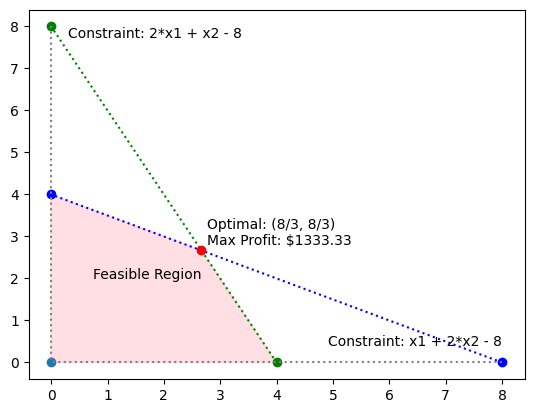

In [2]:
b1_x1 = 2; b1_x2 = 1; lim1 = 8
b2_x1 = 1; b2_x2 = 2; lim2 = 8
m1_profit = 300
m2_profit = 200

def get_bound(x1, x2, constraint):
    x_1 = [constraint/x1, 0.0]
    x_2 = [0.0, constraint/x2]
    return x_1, x_2


def plot_solution(b1_x1, b1_x2, lim1, b2_x1, b2_x2, lim2):
    s1 = Symbol('x1')
    s2 = Symbol('x2')

    x1, y1 = get_bound(b1_x1, b1_x2, lim1)
    x2, y2 = get_bound(b2_x1, b2_x2, lim2)
    
    x1_exp = (lim2 - (b2_x2*s2)) / b2_x1
    x2_exp = b1_x1*(x1_exp) + b1_x2*s2 - lim1

    constraint1 = b1_x1*s1 + b1_x2*s2 - lim1
    constraint2 = b2_x1*s1 + b2_x2*s2 - lim2
    soln = solve((constraint1, constraint2), dict=True)[0]
    
    intersect_x = soln[s1]
    intersect_y = soln[s2]
    max_profit = m1_profit*s1 + m2_profit*s2
    max_profit = float(max_profit.subs({'x1': intersect_x, 'x2': intersect_y}))

    plt.plot(x1, y1, linestyle=':', marker='o', color='green')
    plt.plot(x2, y2, linestyle=':', marker='o', color='blue')
    plt.plot(intersect_x, intersect_y, marker='o', color='red')
    plt.plot(0,0, marker='o')
    plt.plot([0, 0], [lim1, 0], linestyle=':', color='gray')
    plt.plot([lim2, 0], [0, 0], linestyle=':', color='gray')
    plt.fill(
        [0, 0, intersect_x, x1[0]],
        [0, y2[1], intersect_y, 0],
        color='pink', alpha=0.5
    )
    plt.annotate(
        f"Optimal: ({intersect_x}, {intersect_y})\nMax Profit: ${max_profit:0.2f}", # this is the text
        (intersect_x, intersect_y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(4,4), # distance from text to points (x,y)
        ha='left') # horizontal alignment can be left, right or center

    plt.annotate(
        "Feasible Region", # this is the text
        (intersect_x, intersect_y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,-20), # distance from text to points (x,y)
        ha='right') # horizontal alignment can be left, right or center

    plt.annotate(
        f"Constraint: {constraint1}", # this is the text
        (0, lim1), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(12,-8), # distance from text to points (x,y)
        ha='left') # horizontal alignment can be left, right or center

    plt.annotate(
        f"Constraint: {constraint2}", # this is the text
        (lim2, 0), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(-0,12), # distance from text to points (x,y)
        ha='right') # horizontal alignment can be left, right or center
    
    plt.show()


plot_solution(b1_x1, b1_x2, lim1, b2_x1, b2_x2, lim2)

In [10]:
import ipywidgets as widgets

b1_x1_slider = widgets.IntSlider(value=b1_x1, min=1, max=10, step=1, description='b1_x1')
b1_x2_slider = widgets.IntSlider(value=b1_x2, min=1, max=10, step=1, description='b1_x2')
lim1_slider = widgets.IntSlider(value=lim1, min=1, max=10, step=1, description='Max Hrs Machine 1')

b2_x1_slider = widgets.IntSlider(value=b2_x1, min=1, max=10, step=1, description='b2_x1')
b2_x2_slider = widgets.IntSlider(value=b2_x2, min=1, max=10, step=1, description='b2_x2')
lim2_slider = widgets.IntSlider(value=lim2, min=1, max=10, step=1, description='Max Hrs Machine 2')

def compute(b1_x1, b1_x2, lim1, b2_x1, b2_x2, lim2):
    try:
        plot_solution(b1_x1,b1_x2,lim1,b2_x1,b2_x2,lim2)
    except:
        pass

widgets.interactive(
    compute,
    b1_x1=b1_x1_slider.value,
    b1_x2=b1_x2_slider.value,
    lim1=lim1_slider.value,
    b2_x1=b2_x1_slider.value,
    b2_x2=b2_x2_slider.value,
    lim2=lim2_slider.value)

interactive(children=(IntSlider(value=2, description='b1_x1', max=6, min=-2), IntSlider(value=1, description='…

In [ ]:
# (0,0), (0, 4), (10/3, 7/3), (4.5, 0)